In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def generate_config(x0=0, y0=20, n=30, dx=1.):
    x, y = np.linspace(x0, dx*n, n), np.linspace(y0, y0, n)
    return x,y

In [4]:
def potential(x, y, g, k):
    dx, dy=x[1:] - x[:-1], y[1:] - y[:-1]
    harmonic_potential = k * (np.dot(dx,dx) + np.dot(dy,dy))
    gravitational_potential = g * np.sum(y)
    return harmonic_potential + gravitational_potential

In [5]:
def mmc(potential, size, x_init, y_init, beta=1.0, step=0.5, g=9.81, k=50.):
    from random import uniform
    n = len(x_init)
    x_matrix, y_matrix, u_array = np.zeros((size, n)), np.zeros((size, n)), np.zeros(size)
    x_matrix[0], y_matrix[0], u_array[0] = x_init, y_init, potential(x_init, y_init, g, k) 
    for i in range(1, size):
        x_array, y_array, u=x_matrix[i-1][:], y_matrix[i-1][:], u_array[i-1]
        for j in range(1, n-1):
            x_ = x_array[j] + uniform(-step,step)
            y_ = y_array[j] + uniform(-step,step)
            x_update = np.concatenate((x_array[:j],[x_],x_array[j+1:]))
            y_update = np.concatenate((y_array[:j],[y_],y_array[j+1:]))
            u_ = potential(x_update, y_update, g, k)
            if (u_ <= u or uniform(0,1) <  np.exp(-beta*(u_-u))) and y_>=0:
                x_array, y_array, u = x_update, y_update, u_
        x_matrix[i], y_matrix[i], u_array[i] = x_array, y_array, u
    return x_matrix, y_matrix, u_array

In [22]:
x, y = generate_config(n=50,y0=30)
x_matrix, y_matrix, u_array = mmc(potential, 10000, x, y)

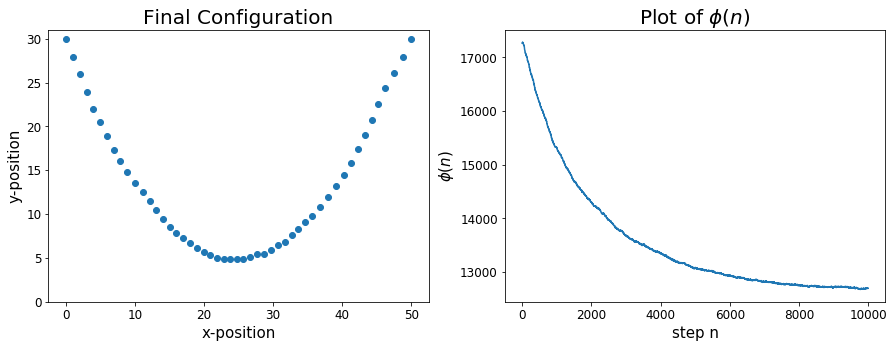

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].tick_params(labelsize=12)
axes[0].set_title('Final Configuration', fontsize = 20)
axes[0].set_xlabel("x-position", fontsize = 15)
axes[0].set_ylabel("y-position", fontsize = 15)
axes[0].set_ylim(0,y_matrix[-1].max()+1)
axes[0].scatter(x_matrix[-1][:], y_matrix[-1][:])

axes[1].tick_params(labelsize=12)
axes[1].set_title('Plot of $\phi(n)$', fontsize = 20)
axes[1].set_xlabel("step n", fontsize = 15)
axes[1].set_ylabel("$\phi(n)$", fontsize = 15)
axes[1].plot(u_array)
plt.show()